# Data Analysis - Titanic Dataset

## Introduction

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean after colliding with an iceberg during its maiden voyage on April 15th 1912. Of the 2,224 passengers, 1,500 died making it one of the deadliest commercial maritime disasters in modern history. This project will be looking at information from 891 of the 2224 passengers and crew and analysing the Titanic dataset to examine the relationships and factors that made an individual more likely to survive.


This project will try to determne whether certain factors played a role in passenger survival. Some questions that would be asked are:
* Did the age of the passengers affect their chances of survival?
* Did passenger class play a role in their chances of survival?
* Did the deck that they were on affect their chances of survival?
* Did passenger travel status(whether they travelled alone or with family)   affect their chances of survival?


## Description of the Dataset



| Variable | Description                                                          |
|----------|----------------------------------------------------------------------|
| survival | Survival,(0 = No; 1 = Yes)                                           |
| pclass   | Passenger Class,(1 = 1st; 2 = 2nd; 3 = 3rd)                          |
| name     | Name                                                                 |
| sex      | Sex                                                                  |
| age      | Age                                                                  |
| sibsp    | Number of Siblings/Spouses Aboard                                    |
| parch    | Number of Parents/Children Aboard                                    |
| ticket   | Ticket Number                                                        |
| fare     | Passenger Fare                                                       |
| cabin    | Cabin                                                                |
| embarked | Port of Embarkation,(C = Cherbourg; Q = Queenstown; S = Southampton) |

**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES)
> 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
> If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
%matplotlib inline

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [3]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see that 2 of the 891 passengers have missing port of embarkation information. The port of embarkation is a catigorical value and for the purposes of the analysis, it will be filled with the most fequent port of embarkation.

In [4]:
titanic_df.groupby('Embarked').size().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
dtype: int64

Southampton(S) is the most frequent port of embarkation and it will be used to fill the missing values.

In [5]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.groupby('Embarked').size().sort_values(ascending=False)

Embarked
S    646
C    168
Q     77
dtype: int64

From the above output, it should be noted that the 2 values were added to S(Southampton).

In [6]:
# function to determine if passenger is a child, female or male.
def passenger_classification(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

In [7]:
# create a new column for passenger.
titanic_df['Passenger'] = titanic_df[['Age','Sex']].apply(passenger_classification, axis = 1)

In [8]:
# looking at the last 20 rows of the DataFrame
titanic_df.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,male
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,female
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,child
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,male
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,male
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,male
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,female


In [9]:
titanic_df.groupby(['Sex','Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

The above output shows the number of male and female passengers in each socio-ecomomic class. Below is a representation of the aforementioned output. 

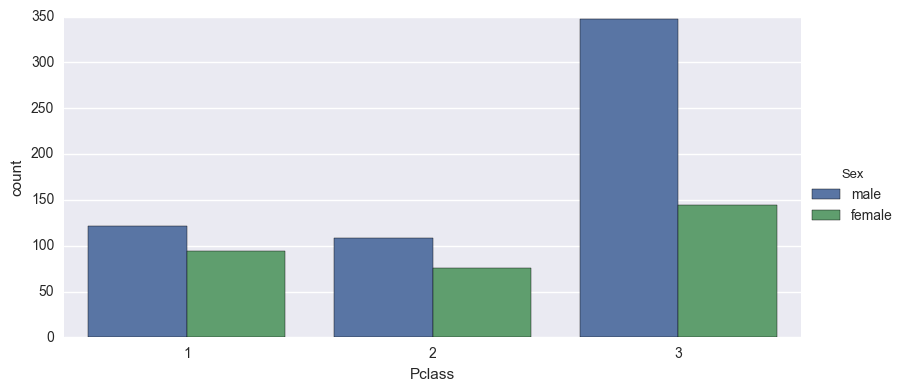

In [10]:
ses = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=2)

It seems that there are a significantly greater amount of males in the 3rd class than females while the number of males to females in the 1st and 2nd classes are somewhat similar.


Below is a pivot table showing the number of survivors by gender and class.

In [11]:
titanic_df.pivot_table('Survived','Sex','Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0


The table shows that 342 people out of the 891 people survived. The number of people that survived per class are as follows: 1st class:136(Male-54,Female-91), 2nd class:87(Male-17,Female-70), 3rd class:119(Male-47,Female-72). It looks like most of the survivors came from the 1st class. This might imply that socio-economic status played a roll in survival. 

In [12]:
did_not_survive = titanic_df[titanic_df['Survived']==0]
len(did_not_survive)
did_not_survive.pivot_table('Survived','Sex','Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3.0,6.0,72.0,81.0
male,77.0,91.0,300.0,468.0
All,80.0,97.0,372.0,549.0


The table shows that 549 people out of the 891 people did not survive. The number of people that did not survive per class are as follows: 1st class:80(Male-77,Female-3), 2nd class:97(Male-91,Female-6), 3rd class:372(Male-300,Female-72). It seems that most of the people that did not survive came from the 3rd class. This also suggests that individuals that had a higher socio-economic status were more likely to survive.

In [13]:
# Port of embarkation for passengers in the different classes that survived and didn't survive.
cross_tabulation = pd.crosstab(index = [titanic_df['Survived'], titanic_df['Pclass']], columns = [titanic_df['Sex'], titanic_df['Embarked']]) 

In [14]:
cross_tabulation.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  48  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [15]:
cross_tabulation.index, cross_tabulation.columns

(MultiIndex(levels=[[0, 1], [1, 2, 3]],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=['Survived', 'Pclass']),
 MultiIndex(levels=[['female', 'male'], ['C', 'Q', 'S']],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=['Sex', 'Embarked']))

In [16]:
cross_tabulation.columns.set_levels(['Female', 'Male'], level = 0, inplace = True)
cross_tabulation.columns.set_levels(['Cherbourg', 'Queenstown', 'Southampton'], level = 1, inplace = True)
cross_tabulation

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          48        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

This table is in accordance with the previous outputs that show that Southampton was the most frequent port of embarkation and Pclass 3 had the most people.

Below is a represention of the passengers(child,female,male) in each Pclass.

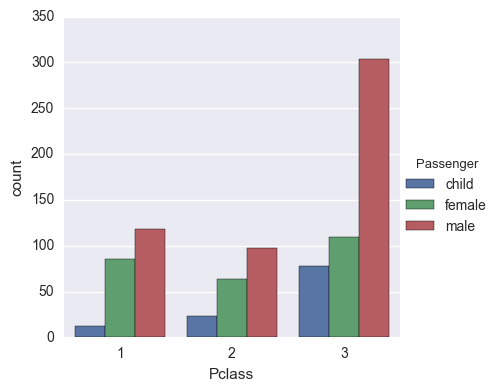

In [17]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Passenger', hue_order=['child', 'female', 'male'] )

In [18]:
titanic_df.groupby('Pclass')['Passenger'].value_counts()

Pclass  Passenger
1       male         118
        female        86
        child         12
2       male          97
        female        64
        child         23
3       male         304
        female       109
        child         78
Name: Passenger, dtype: int64

As seen before, the majority of the passengers are in Pclass 3, something that also sticks out is that Pclass 3 has significantly more children that the other classes.

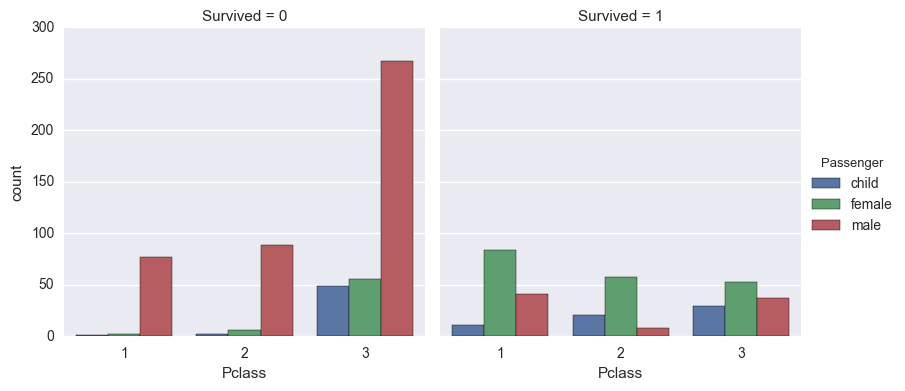

In [19]:
# Show the number of passengers that didn't survive vs survived for each Pclass.
sns.factorplot('Pclass', data=titanic_df, kind='count', col='Survived', hue='Passenger', hue_order=['child', 'female', 'male'])

As suspected, most of the survivers are in the higher socio-economic classes(Pclasses 1&2). Judging from the plot, it seems that almost all the women and children from those classes survived.

In [20]:
# drop the missing values for the passengers with their age missing.
passenger_age = titanic_df['Age'].dropna()

In [21]:
passenger_age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The average age of an indivdual on the Titanic was $\approx$ 30 years old and the median age was 28 years old.

/Users/Sirron/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


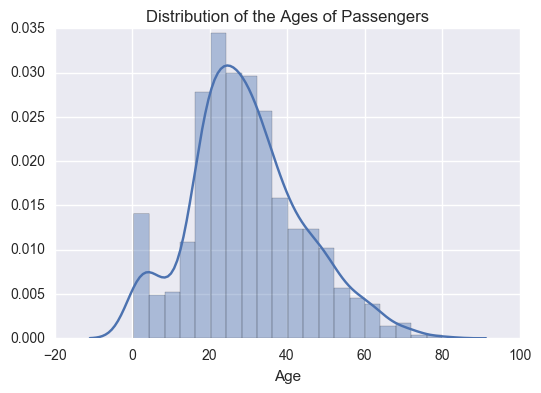

In [22]:
# Distribution of ages with a density plot.
age_distribution = sns.distplot(passenger_age)
age_distribution.set_title('Distribution of the Ages of Passengers')

This distribution is slightly skewed to the right which is confirmed by the mean being slightly greater than the median and the meaian being closer to the first quartile than the third quartile.

Below are a few other distribution plots of passengers' ages by gender, passenger classification and socio-economic class.

/Users/Sirron/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


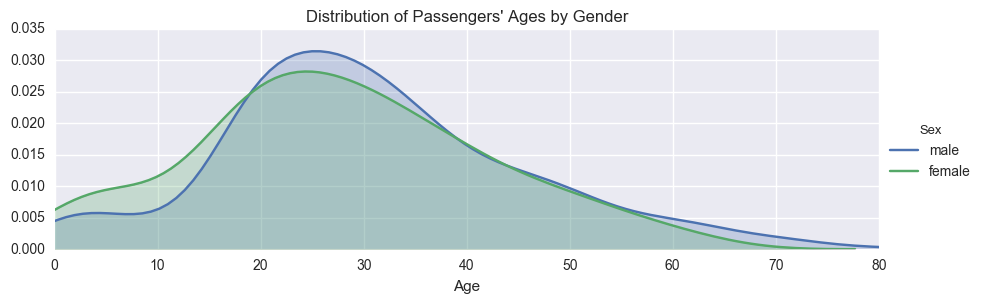

In [23]:
passenger_distribution = sns.FacetGrid(titanic_df, hue='Sex', aspect=3)
passenger_distribution.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
passenger_distribution.set(xlim=(0,oldest))
passenger_distribution.set(title="Distribution of Passengers' Ages by Gender")
passenger_distribution.add_legend()

The above distributions are skewed to the right.

/Users/Sirron/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


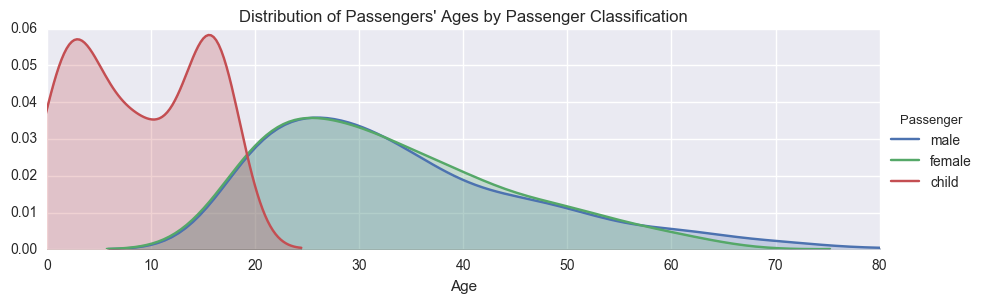

In [24]:
passenger_distribution = sns.FacetGrid(titanic_df, hue='Passenger', aspect=3)
passenger_distribution.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
passenger_distribution.set(xlim=(0,oldest))
passenger_distribution.set(title="Distribution of Passengers' Ages by Passenger Classification")
passenger_distribution.add_legend()

The male and female distributions of passengers' ages by passenger classification are skewed to the right akin to the distributions of passengers' ages by gender but the child distribution of passengers' ages by passenger classification is bimodal, the variances are similar and the means are different.

/Users/Sirron/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


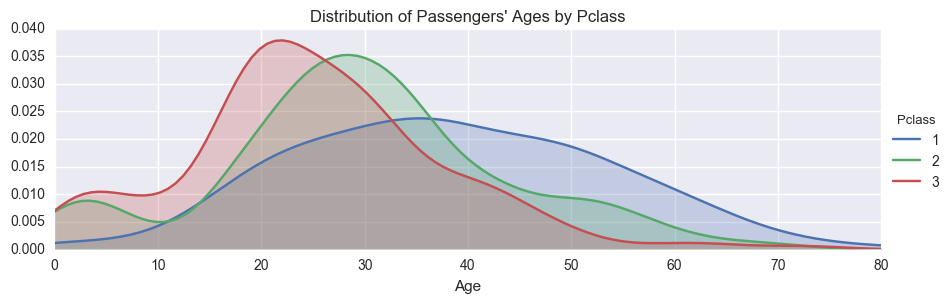

In [25]:
passenger_distribution = sns.FacetGrid(titanic_df, hue='Pclass', aspect=3)
passenger_distribution.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
passenger_distribution.set(xlim=(0,oldest))
passenger_distribution.set(title="Distribution of Passengers' Ages by Pclass")
passenger_distribution.add_legend()

The distribution of passengers' ages by Pclass is $\approx$ normal for Pclass 1 and skewed to right for Pclasses 2&3. This suggests that most of the people in Pclasses 2&3 are around the median age.

In [26]:
# Drop missing values and find the number of passengers in each cabin.

titanic_deck = titanic_df['Cabin'].dropna()
deck = []
for cabin in titanic_deck:
    deck.append(cabin[0])
Counter(deck)

Counter({'A': 15, 'B': 47, 'C': 59, 'D': 33, 'E': 32, 'F': 13, 'G': 4, 'T': 1})

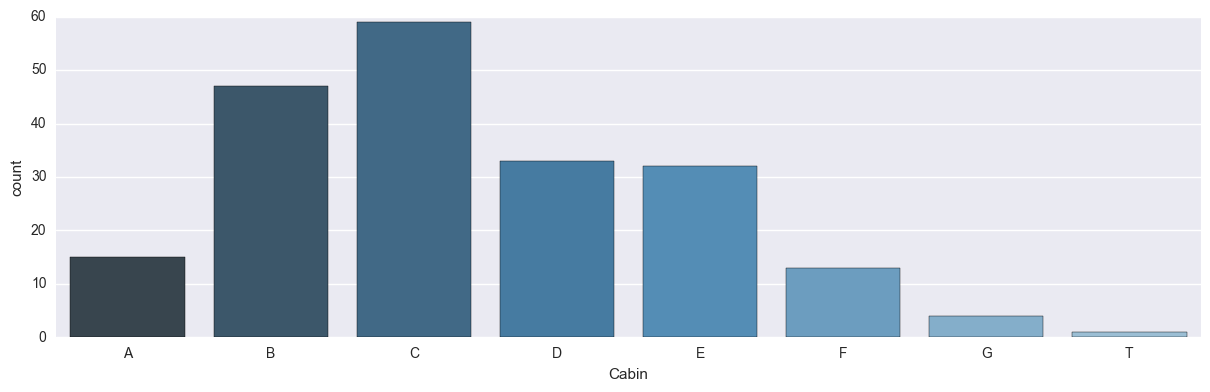

In [27]:
# Create cabin DataFrame and factorplot the cabins.
cabin_df = pd.DataFrame(deck)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], kind='count', aspect=3, palette='Blues_d')

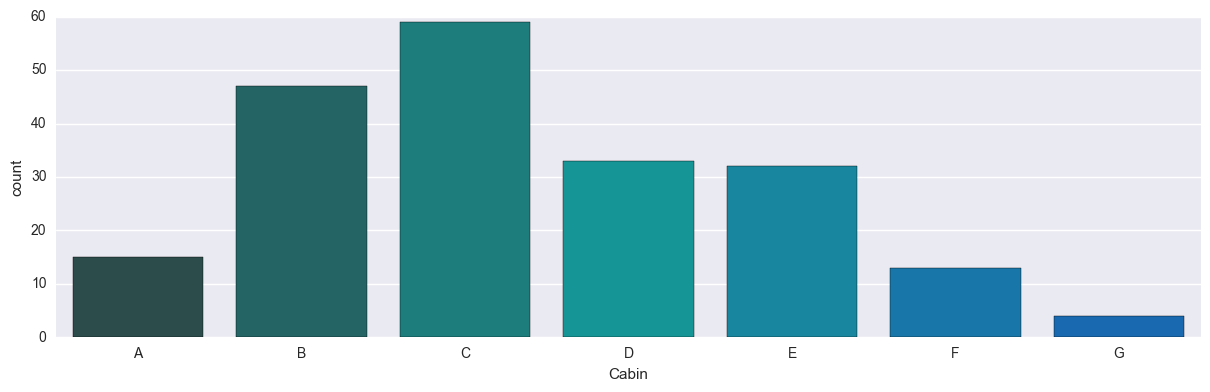

In [28]:
# Get rid of Cabin T and factorplot the cabins.
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
sns.factorplot('Cabin', data=cabin_df,order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], kind='count', aspect=3, palette='winter_d')

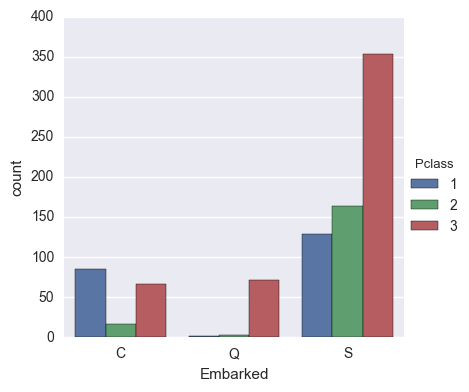

In [29]:
# Port of embarkation for the various passenger classes.
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C', 'Q', 'S'])

The plot shows that most of the passengers came from Southhampton. It also shows that almost all of the passengers that embarked from Queenstown were in the third class and that a significant number of passengers that embarked from Cherbourg were in the first class. This may indicate that economic factors played a role, however, to gain further insight, the economic climate for that period of time will have to be examined.

In [30]:
# Tabular representation of the data.
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns =  [['Cherbourg', 'Queenstown', 'Southampton']]
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,129
2,17,3,164
3,66,72,353


In [31]:
port.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [32]:
port.index = [['First', 'Second', 'Third']]
port

,Cherbourg,Queenstown,Southampton
First,85,2,129
Second,17,3,164
Third,66,72,353


In [33]:
# Determine if passengers were alone or with family(parents or siblings).
# Add a column showing passenger travel status.
titanic_df['Passenger Travel Status'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Passenger Travel Status'].loc[titanic_df['Passenger Travel Status'] > 0] = 'With family'
titanic_df['Passenger Travel Status'].loc[titanic_df['Passenger Travel Status'] == 0] = 'Alone'
titanic_df.head()

/Users/Sirron/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Passenger Travel Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


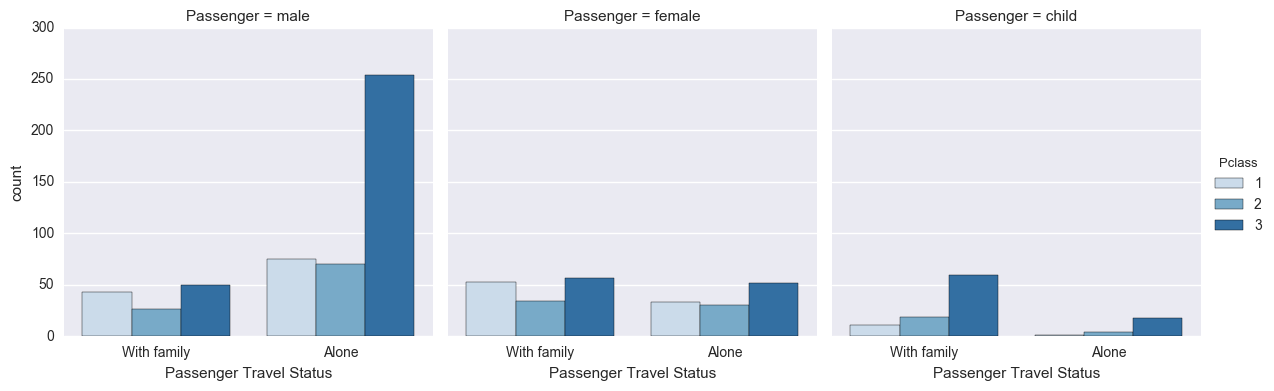

In [34]:
# Plot of Passenger Travel Status by Pclass.
figure = sns.factorplot('Passenger Travel Status', data=titanic_df, hue='Pclass', col='Passenger', kind='count', palette='Blues')
figure.set_xlabels('Passenger Travel Status')

The above plots show that the majority of males in the third class travelled alone, females that travelled alone or with family are similar throughout the classes and most of the children travelled with family and of those that didn't, most of them were in the third class.

## Factors that played a role in passenger survival.

In [35]:
# Create a survivor column by mapping the values of the survived column to no and yes.
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Passenger Travel Status,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


### Class factor in passenger survival.

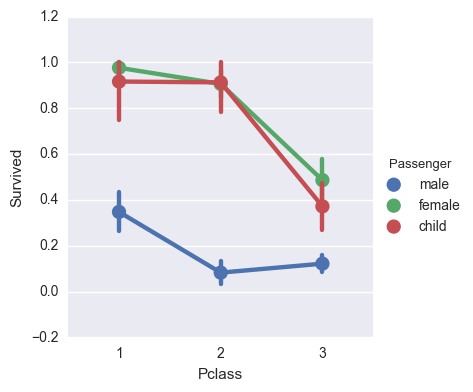

In [36]:
# Plot of survived vs. passenger by Pclass.
sns.factorplot('Pclass', 'Survived', data=titanic_df, hue='Passenger')

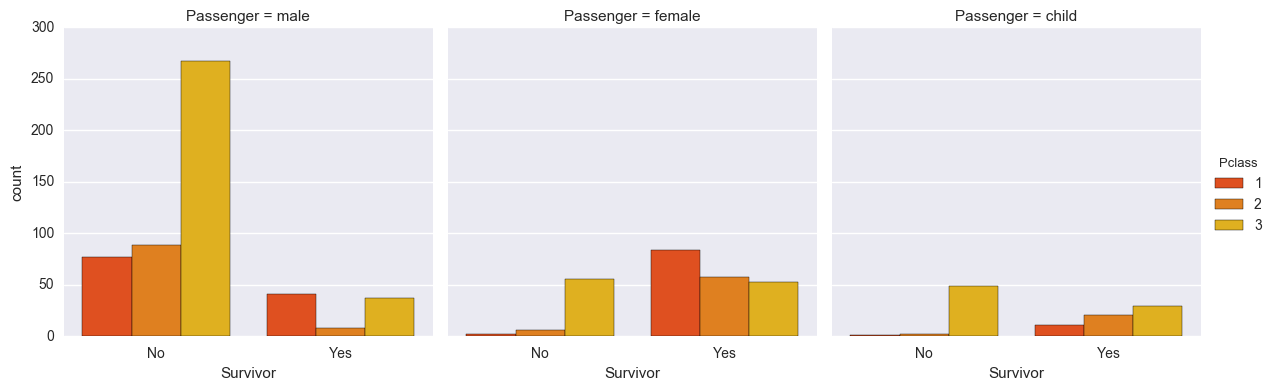

In [37]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', col='Passenger', kind='count', palette='autumn')

From the above plots, it seems that being male reduces the chances of survival and being thrid class further reduces the chances of survival.

### Age factor in passenger survival.
Let's see whether age played a role in passenger survival.

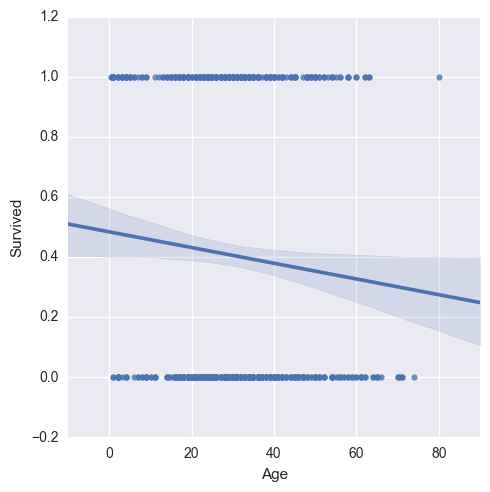

In [38]:
sns.lmplot('Age', 'Survived', data=titanic_df);

The above plot shows a negative correlation(as age increases, survival decreases), the older the individual, the less likely their chance of survival.

Below we will look at age vs. survival grouped by passenger class.

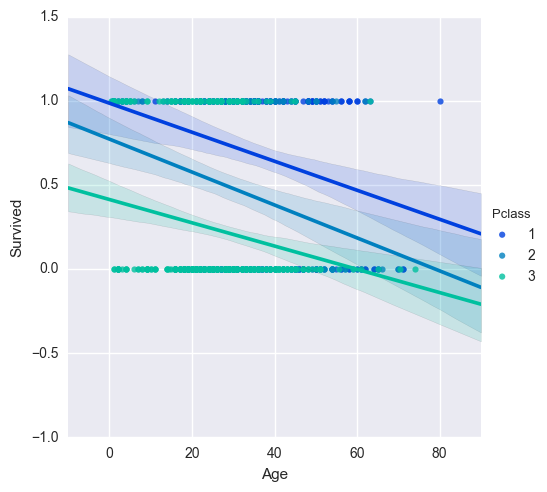

In [39]:
sns.lmplot('Age', 'Survived', hue='Pclass', hue_order=range(1,4), data=titanic_df, palette='winter');

The above plot shows a negative correlation in all classes as the individuals' age increased. The chances of survival decreased with as age increased.

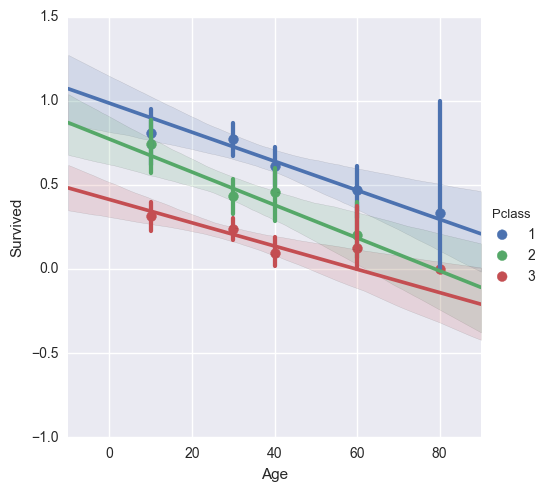

In [41]:
# create bins for generations.
generations = [10,10,30,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, x_bins=generations);

The above plot further reiterates the trend that as age increases, survival decreases.

### Deck factor in passenger survival.

In [50]:
titanic_DF = titanic_df.dropna(subset=['Cabin'])
titanic_DF['Deck'] = deck
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']
titanic_DF.tail()

/Users/Sirron/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Passenger Travel Status,Survivor,Deck
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,With family,Yes,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,Alone,No,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,With family,Yes,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes,B
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes,C


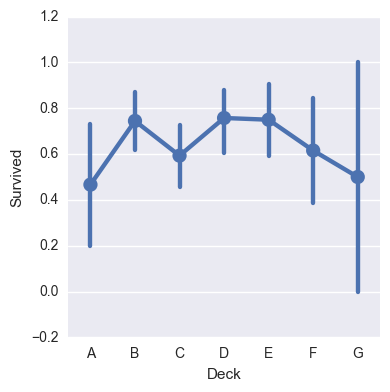

In [46]:
# Plot to see whether there is a relation between deck and survival.
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B', 'C', 'D', 'E', 'F', 'G']);

The deck does not seem to significantly affect survival.

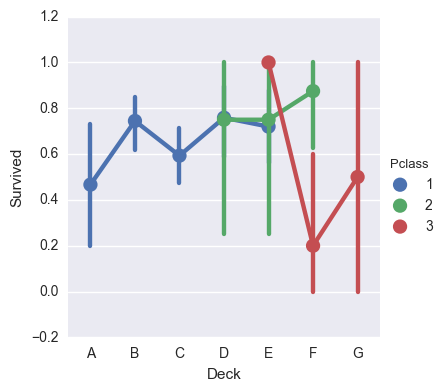

In [44]:

sns.factorplot('Deck', 'Survived', data=titanic_DF, hue='Pclass', order=['A','B', 'C', 'D', 'E', 'F', 'G']);

The above plot doesn't give much information other than showing that for the most part the passenger classes were seperated by deck.  

### Passenger Travel Status factor in passenger survival.

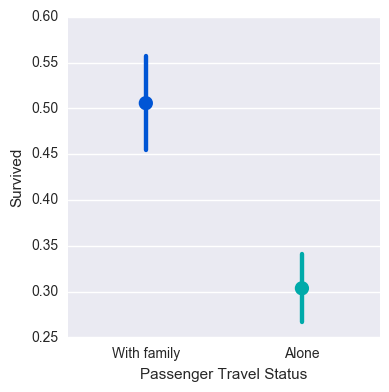

In [53]:
sns.factorplot('Passenger Travel Status', 'Survived', data=titanic_df, palette='winter');

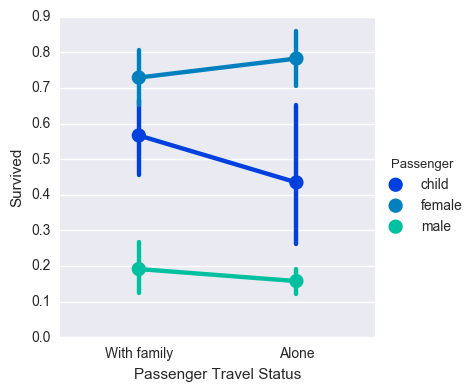

In [56]:
sns.factorplot('Passenger Travel Status', 'Survived', hue='Passenger', hue_order=['child', 'female', 'male'], data=titanic_df, palette='winter');

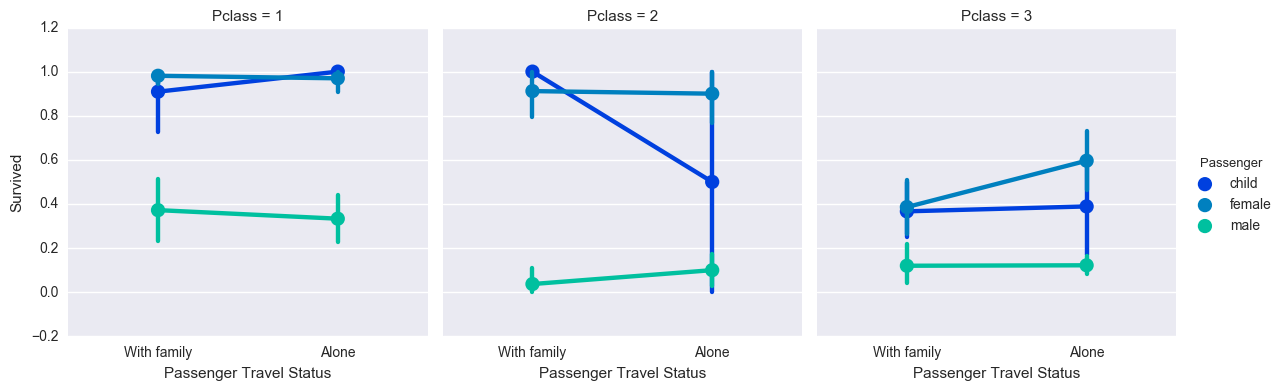

In [57]:
sns.factorplot('Passenger Travel Status', 'Survived', hue='Passenger', hue_order=['child', 'female', 'male'], col='Pclass', col_order=[1,2,3], data=titanic_df, palette='winter');

The first plot on Passenger Travel Status versus Survived shows that survival decreases significantly for passengers that travelled alone. The second plot shows that the rate of survival increased for women that were alone and decreased for children and men tat were alone. In the third plot, we see that passenger class one has a higher overall rate of survival that isn't really different for those with family versus those who travelled alone. In passenger class two, children who were with family had a greater chance of survival while survival based on passenger travel status for both male and female was not significant. In passenger class three, women who were alone seemed to have a greater chance of survival while survival based on passenger travel status for children and males was not significant.

## Conclusion

In summation, all the above results are tentative but it seems that age, demographics and passenger class affect the chances of survival. Survival was shown to have decreased as the passenger got older, being a male passenger also led to a decreased survival rate and the lower the passenger class, the lower the chance of survival for the passenger. With respect to deck and passenger travel status, the results don't really show whether they affect the chances of passenger survival. The deck the passengers were on didn't significantly affect passenger survival. For passenger travel status, one plot showed that those who travelled with family were more likely to survive versus those who travelled alone, the other plots didn't show a significant difference. 

